In [11]:
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
import os
from IPython.display import display,Image
load_dotenv();

In [7]:
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = os.getenv("GEMINI_API_KEY")

In [ ]:
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0.5
)

In [9]:
class State(TypedDict):
    messages: List[HumanMessage] 

def process(state:State) -> State:
    response = llm.invoke(state["messages"])
    print("AI Response: ", response.content)
    return state

In [10]:
# define the graph
graph = StateGraph(State)

graph.add_node("processing",process)

# add edges
graph.add_edge(START,"processing")
graph.add_edge("processing",END)

# compile graph
app = graph.compile()

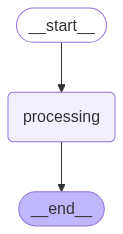

In [12]:
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
query = input("Enter your Query: ")
while query != "exit":    
    result = app.invoke({"messages": [HumanMessage(content=query)]})
    query = input("Enter your Query: ")

AI Response:  Hello! How can I help you today?
AI Response:  Okay, Ahmed! It's nice to meet you (or to "meet" you virtually). How can I help you today?
AI Response:  As a large language model, I don't have access to personal information. Therefore, I don't know your name. You haven't told me!
